In [ ]:
'''
Objectives:
classify DNA sequences using k-nearest neighbors (kNN) and
decision tree methods

focus on real-world challenges such as noisy data and imbalanced classes. 

perform a hyperparameter sensitivity analysis to understand the
impact of tuning key parameters on model performance.
'''

In [30]:
# import block
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for plotting AUC
import textwrap
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

# for decision tree classifier 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# for KNN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import  GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score


In [31]:
# load files
# sequences
# DNA sequences that bind to CTCF
file_path = '/Users/peytonhall/downloads/assignment_04/ctcf_bound_sequence.txt'
seqBound = pd.read_csv(file_path, sep='\t', header=None)
seqBound
# label as y = 1

# DNA sequences that DO NOT bind to CTCF
file_path = '/Users/peytonhall/downloads/assignment_04/ctcf_unbound_sequence.txt'
seqUnbound = pd.read_csv(file_path, sep='\t', header=None)
seqUnbound
# label as y = 0

,0
0,TTTATTGACCACCTAGAAGCGGTTTGGCGT
1,GGAAGGTCCCACCAGGCGGAACCGCAATAT
2,GATCATGGCCACCTGGGGGGAACATTACGC
3,TGATTTAGGCACTAGAGGGCCCTGTAAGCC
4,AAATCCTACCACTTGAGGGCGGGCCGGGAT
...,...
1995,ATTCCCCGCCACCAGCTGGCGTCAGGGACA
1996,GTGGTAGGCCATCAGAGGTCGATGGCGTCT
1997,GGGCGCCTGCAGCAGGTGACAGATTACGCT
1998,GGGCTCGGCGAGTCGTTTGCGATGAGAGCC


In [32]:
# shape features
#(Minor Groove Width, Propeller Twist, Roll, Helical Twist). 
# Import Bound
file_path = '/Users/peytonhall/downloads/assignment_04/ctcf_bound.HelT'
boundHel = pd.read_csv(file_path, sep='\t', header=None)
boundHel = boundHel[0].str.split(" ", expand=True)
boundHel = boundHel.apply(pd.to_numeric)
boundHel

file_path = '/Users/peytonhall/downloads/assignment_04/ctcf_bound.MGW'
boundMGW = pd.read_csv(file_path, sep='\t', header=None)
boundMGW = boundMGW[0].str.split(" ", expand=True)
boundMGW = boundMGW.apply(pd.to_numeric)
boundMGW

file_path = '/Users/peytonhall/downloads/assignment_04/ctcf_bound.ProT'
boundPro = pd.read_csv(file_path, sep='\t', header=None)
boundPro = boundPro[0].str.split(" ", expand=True)
boundPro = boundPro.apply(pd.to_numeric)
boundPro

file_path = '/Users/peytonhall/downloads/assignment_04/ctcf_bound.Roll'
boundRoll = pd.read_csv(file_path, sep='\t', header=None)
boundRoll = boundRoll[0].str.split(" ", expand=True)
boundRoll = boundRoll.apply(pd.to_numeric)
boundRoll

# Import Unbound
file_path = '/Users/peytonhall/downloads/assignment_04/ctcf_unbound.HelT'
unboundHel = pd.read_csv(file_path, sep='\t', header=None)
unboundHel = unboundHel[0].str.split(" ", expand=True)
unboundHel = unboundHel.apply(pd.to_numeric)
unboundHel

file_path = '/Users/peytonhall/downloads/assignment_04/ctcf_unbound.MGW'
unboundMGW = pd.read_csv(file_path, sep='\t', header=None)
unboundMGW = unboundMGW[0].str.split(" ", expand=True)
unboundMGW = unboundMGW.apply(pd.to_numeric)
unboundMGW

file_path = '/Users/peytonhall/downloads/assignment_04/ctcf_unbound.ProT'
unboundPro = pd.read_csv(file_path, sep='\t', header=None)
unboundPro = unboundPro[0].str.split(" ", expand=True)
unboundPro = unboundPro.apply(pd.to_numeric)
unboundPro

file_path = '/Users/peytonhall/downloads/assignment_04/ctcf_unbound.Roll'
unboundRoll = pd.read_csv(file_path, sep='\t', header=None)
unboundRoll = unboundRoll[0].str.split(" ", expand=True)
unboundRoll = unboundRoll.apply(pd.to_numeric)
unboundRoll

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-2.138866,-1.188803,8.144425,-3.594348,-1.857451,6.803225,-0.611546,-2.271277,-0.679316,2.357328,...,1.939955,-0.891714,-3.793289,-3.715151,-3.074820,2.972331,-1.409185,-2.017498,4.231595,-2.051757
1,-1.302453,-0.268893,-3.940038,-3.939700,-3.015928,-4.588016,-2.779263,-1.039200,-2.007505,2.045589,...,-3.643554,-2.861020,-0.502418,2.454390,-1.127386,4.390614,-2.874587,-4.188812,7.345188,-2.858780
2,-0.599531,-4.394622,-1.070906,4.988440,-4.006577,3.526304,-1.787354,-2.079422,-1.477624,2.200573,...,-1.007394,-3.901558,-3.668811,5.711183,-5.205194,-2.060240,6.222474,-2.413164,3.972157,-1.768682
3,4.019381,-0.192562,-4.753694,-2.149995,-0.837322,6.614321,-2.326235,-1.738418,-1.875802,2.850543,...,-2.238098,-2.130540,-2.812258,3.697177,-2.020011,6.100336,-2.466852,-2.647687,-3.007220,-2.114107
4,1.232321,-2.421489,-7.016572,-2.424993,-1.620575,-2.987259,3.488762,-2.473886,-0.756519,2.728051,...,1.379277,-1.750595,-1.580441,-1.955026,-1.489836,1.836110,-1.679136,-1.077042,-0.993061,-4.121867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-4.596695,-3.388017,-1.148492,-1.454612,-2.092157,-1.830902,1.591822,-1.716677,-1.213729,2.552442,...,3.374193,-2.423626,-1.170169,4.213751,-2.806761,-2.416383,-0.749644,-1.886643,-2.492170,5.000802
1996,-1.952929,3.597276,-0.659843,-2.456631,3.297228,-2.844787,-1.933930,-2.578702,-1.987648,3.693495,...,5.058935,-0.005732,-3.783879,3.356137,-1.896326,-2.083890,3.185255,-2.864871,-1.486886,-0.007294
1997,-1.890534,-1.500420,-1.703959,2.043182,-2.095430,-1.749877,-2.046567,3.445784,-0.961530,3.389671,...,3.501926,-1.894808,-0.730937,-5.563169,-2.478316,5.558130,-2.429001,3.562737,-2.110448,-0.875049
1998,-1.969470,-1.877403,-2.659123,-2.582295,-1.189514,4.403155,-0.844865,-1.530300,3.505199,-1.379821,...,4.869134,-0.381406,-4.299625,5.046129,-1.478917,-1.756180,-1.437251,-2.640308,-2.548122,-1.925925


In [33]:
# combine bound and unbound to get 4 shape features
# shape is (4000, 29)
shapeHel = np.vstack((boundHel, unboundHel))
# shape is (4000, 29)
shapeRoll = np.vstack((boundRoll, unboundRoll))

# shape is (4000, 30)
shapeMGW = np.vstack((boundMGW, unboundMGW))
# shape is (4000, 30)
shapePro = np.vstack((boundPro, unboundPro))

# print(shapeHel.shape)

In [34]:
# Part 1. Feature Extraction
# Load and standardize these features using min-max normalization
# scale function
# make min-max normalization function
def normalizationFunct(shape):
    minShape = np.min(shape, axis=0)  # Minimum for each column
    maxShape = np.max(shape, axis=0)  # Maximum for each column
    y = (shape - minShape) / (maxShape - minShape)
    return y

In [35]:
# apply normalization function
# shape is (4000, 29)
normalHel = normalizationFunct(shapeHel)
# shape is (4000, 29)
normalRoll = normalizationFunct(shapeRoll)

# shape is (4000, 30)
normalMGW = normalizationFunct(shapeMGW)

# shape is (4000, 30)
normalPro = normalizationFunct(shapePro)

In [36]:
# combine all 4 normalized features into an array - THIS IS SHAPE FEATURE SET
# shape is (4000, 118)
normalShape = np.hstack((normalHel, normalRoll, normalMGW, normalPro))

In [37]:
# make one hot encoding function
def encodeMono(sequence):
    monoMap = {"A": [1, 0, 0, 0], "C": [0, 1, 0, 0], "G": [0, 0, 1, 0], "T": [0, 0, 0, 1]}
    encoded = []
    for mononucleotide in sequence:
        encoded.extend(monoMap[mononucleotide])
    return encoded

In [38]:
# apply to DNA sequences
# Bound
# shape is (2000, 120)
preBound = seqBound[0].tolist()
encodeBound = np.array([encodeMono(seq) for seq in preBound])

# Unbound
# shape is (2000, 120)
preUnBound = seqUnbound[0].tolist()
encodeUnBound = np.array([encodeMono(seq) for seq in preUnBound])

In [39]:
# print(encodeUnBound.shape)

In [40]:
# make one from bound and unbound
# shape is (4000, 120)
monoMer = np.vstack((encodeBound, encodeUnBound))
# print(monoMer.shape)

In [41]:
# Combine the one-hot encoded DNA sequences (1mer) with the
# normalized shape features (1mer+shape) for the CTCF bound and 
# unbound datasets.
# shape is (4000, 238) (120 encoded seq from 30 seq*4 + 118)
xVar = np.hstack((monoMer, normalShape))
# print(xVar.shape)

In [42]:
# make y var for model
boundYLab = [1] * 2000
boundYLab = np.array(boundYLab)
unBoundYLab = [0] * 2000
unBoundYLab = np.array(unBoundYLab)

# shape is (4000,)
totalYLab = np.hstack((boundYLab, unBoundYLab))

In [43]:
# Part 2: KNN with noisy data
# Shape is (4000, 118) same as normalShape
'''
: Simulate real-world noise by adding Gaussian noise to your shape feature
set, not the one-hot-encoded sequences.
'''
# add gaussian noise
noisyShape = normalShape + np.random.normal(0, 0.1,normalShape.shape)

#test
# print(noisyShape.shape)
# print(normalShape.shape)

In [44]:
# new x with noisy data
# shape is (4000, 238) same as original xVar
noisyX = np.hstack((monoMer, noisyShape))
# print(noisyX.shape)

In [45]:
# make knn model
def knnFunct(X, y):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Set up the parameter grid for n_neighbors
    param_grid = {'n_neighbors': range(1, 21)}
    
    # Create a KNN classifier
    knn = KNeighborsClassifier()
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
    
    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_knn = grid_search.best_estimator_
    
    # Use the best model to predict on the test set
    y_pred = best_knn.predict(X_test)
    
    # Get predicted probabilities for AUROC
    y_proba = best_knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    
    # Evaluate the model
    # Model Evaluation
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    auroc = metrics.roc_auc_score(y_test, y_proba)

    # Print results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("AUROC:", auroc)

    return grid_search.best_params_, grid_search.best_score_

In [46]:
# train noisy data
trainedNoise = knnFunct(noisyX, totalYLab)

Accuracy: 0.61875
Precision: 0.838150289017341
Recall: 0.34360189573459715
F1-score: 0.48739495798319327
AUROC: 0.6347639108302615


In [47]:
# train normal data
trainNormal = knnFunct(xVar, totalYLab)

Accuracy: 0.6225
Precision: 0.8571428571428571
Recall: 0.3412322274881517
F1-score: 0.48813559322033895
AUROC: 0.6388700819980441


In [48]:
metrics = evaluate_knn(noisyX, totalYLab)

# Plotting the metrics
plt.figure(figsize=(14, 8))

plt.plot(metrics['k'], metrics['accuracy'], label='Accuracy', marker='o')
plt.plot(metrics['k'], metrics['precision'], label='Precision', marker='o')
plt.plot(metrics['k'], metrics['recall'], label='Recall', marker='o')
plt.plot(metrics['k'], metrics['f1'], label='F1-score', marker='o')
plt.plot(metrics['k'], metrics['auroc'], label='AUROC', marker='o')

plt.title('KNN Performance Metrics vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.xticks(metrics['k'])  # Ensure x-axis ticks correspond to k values
plt.legend()
plt.grid()
plt.show()

NameError: name 'evaluate_knn' is not defined

In [ ]:
'''
Clean vs. Noisy Data Comparison: training on noisy data actually seemed to lower the accuracy
of the normal data. The accuracy of the noisy data was 0.64125 and the 
accuracy of the normal data was 0.6225. Noise seems to decrease the accuracy and precision
of model performance. 

As number of neighbors (k) increases, F1 score, accuracy, and recall decreases, but precision 
and AUROC seems to increase indicating that the model's ability to differentiate between a 
true positive and a false positive seems to increase. 
'''

In [ ]:
# PART 3: DECISION TREES WITH IMBALANCES

In [285]:
# stimulate imbalance 

print(encodeUnBound.shape)

# Randomly sample 1000 rows from the original dataset
samples = np.random.choice(len(encodeUnBound), 1000, replace=False)
imbalUnBound = encodeUnBound[samples]

# Check the shape of the new dataset
print(imbalUnBound.shape)  # Should be (1000, 120)

(2000, 120)
(1000, 120)


In [302]:
# need to also imbalance the bound for the imbalanced monoMer because
# it needs to be 4000 in total by some means. if unBound is now 1000, 
# I'm going to make imbalBound (3000, 120) by adding encodeBound to 
# 1500 randomly removed samples of encodeBound 

halfBound = encodeBound[np.random.choice(len(encodeBound), 1000, replace=False)]

imbalBound = np.vstack((encodeBound, halfBound))

print(imbalBound.shape)

(3000, 120)


In [304]:
# check old monoMer again
# shape is (4000, 120)
# monoMer = np.vstack((encodeBound, encodeUnBound))
# print(monoMer.shape)
# make new bound+unbound array

# shape is (3000, 120) (x = 1000 from imbalancedUnbound and 2000 from encodeBound)
monoUnbalMer = np.vstack((imbalBound, imbalUnBound))


print(monoUnbalMer.shape)
# print(encodeBound.shape)

(4000, 120)


In [307]:
# check old xVar again
# xVar = np.hstack((monoMer, normalShape))
# shape is (4000, 238)
# print(xVar.shape)

# shape is (3000, 120)
# print(monoUnbalMer.shape)

# NEW MONOUNBALMER IS (4000,120) I FIXED IT YAY

# # shape is (4000, 118)
# print(normalShape.shape)
'''
problem: can't do hstack or vstack because both are different now. 
monoUnbalMer is 3000 instead of 4000 bc it's unbalanced 
encodeUnBound + balanced encodeBound

could hstack monoMer and normalShape before because both had 4000
- do i add 1000 random to the encodeBound because both would be unbalanced?

**issue resolved above i added 1000 randomly sampled bound to bound to get imbalBound

'''

# concat unbal 1mer and shape
xUnbalVar = np.hstack((monoUnbalMer, normalShape))
print(xUnbalVar.shape)

print(xVar.shape)

# both are (4000, 238) now yayy

(4000, 238)
(4000, 238)


In [360]:
from sklearn import metrics

def decisionTree(X, y):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% training and 20% test
    
    # Create Decision Tree classifier object
    clf = DecisionTreeClassifier(random_state=1)

    # Train Decision Tree Classifier
    clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Model Evaluation
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    auroc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    # Print results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:\n", confusion)
    print("AUROC:", auroc)

#     return y_pred
    return accuracy

# # Example usage
# # y_pred = decisionTree(X, y)


In [383]:
# imbalanced output
imbalOutput = decisionTree(xUnbalVar, totalYLab)

Accuracy: 0.79
Precision: 0.8142493638676844
Recall: 0.7710843373493976
F1-score: 0.792079207920792
Confusion Matrix:
 [[312  73]
 [ 95 320]]
AUROC: 0.790736973869504


In [384]:
# balanced output
balOutput = decisionTree(xVar, totalYLab)

Accuracy: 0.7375
Precision: 0.7530864197530864
Recall: 0.7349397590361446
F1-score: 0.7439024390243902
Confusion Matrix:
 [[285 100]
 [110 305]]
AUROC: 0.7375997496479425


In [376]:
'''
Plot the relationship between k and model performance using matplotlib.

i'm not sure what k is in this context, so i'm assuming it's the varying depths of the decision tree. 
'''

In [380]:
# make function to evaluate performance and plot
def decisionTreePerform(X, y, maxDepths):
    # make dictionary of model performance metrics
    metrics_dict = {
        'depths': [],
        'accuracies': [],
        'precisions': [],
        'recalls': [],
        'f1_scores': [],
        'auroc_scores': []
    }
    
    for depth in maxDepths:
        # sort of recreate funct bc when i play with dict in other funct i get issues for some reason
        # make classifier with spec. depth
        
        clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
        
         # split training and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

        # train
        clf.fit(X_train, y_train)

        # make prediction
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

        # get metrics 
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        auroc = metrics.roc_auc_score(y_test, y_pred_proba)

        # Append the metrics to the dictionary
        metrics_dict['depths'].append(depth)
        metrics_dict['accuracies'].append(accuracy)
        metrics_dict['precisions'].append(precision)
        metrics_dict['recalls'].append(recall)
        metrics_dict['f1_scores'].append(f1)
        metrics_dict['auroc_scores'].append(auroc)

    # plot metrics against max depths
    plt.figure(figsize=(12, 6))
    
    plt.plot(metrics_dict['depths'], metrics_dict['accuracies'], label='Accuracy', marker='o')
    plt.plot(metrics_dict['depths'], metrics_dict['precisions'], label='Precision', marker='o')
    plt.plot(metrics_dict['depths'], metrics_dict['recalls'], label='Recall', marker='o')
    plt.plot(metrics_dict['depths'], metrics_dict['f1_scores'], label='F1-score', marker='o')
    plt.plot(metrics_dict['depths'], metrics_dict['auroc_scores'], label='AUROC', marker='o')

    plt.title('Decision Tree Performance Metrics vs. Max Depth')
    plt.xlabel('Max Depth')
    plt.ylabel('Score')
    plt.xticks(metrics_dict['depths'])
    plt.legend()
    plt.grid()
    plt.show()


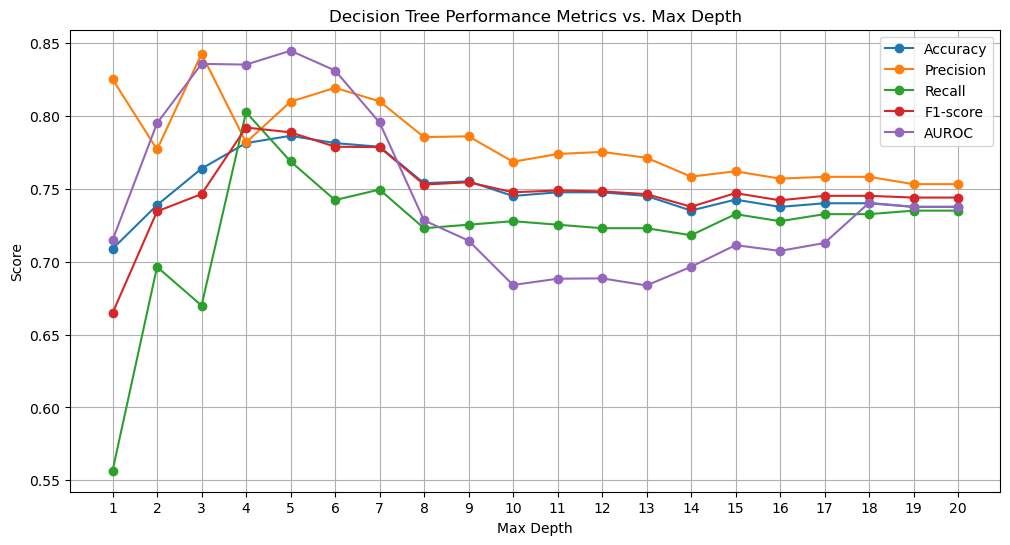

In [381]:
# plot decision tree performance for the normal data (not unbalanced)

maxDepths = range(1, 21)  # Adjust this range as needed
decisionTreePerform(xVar, totalYLab, maxDepths)

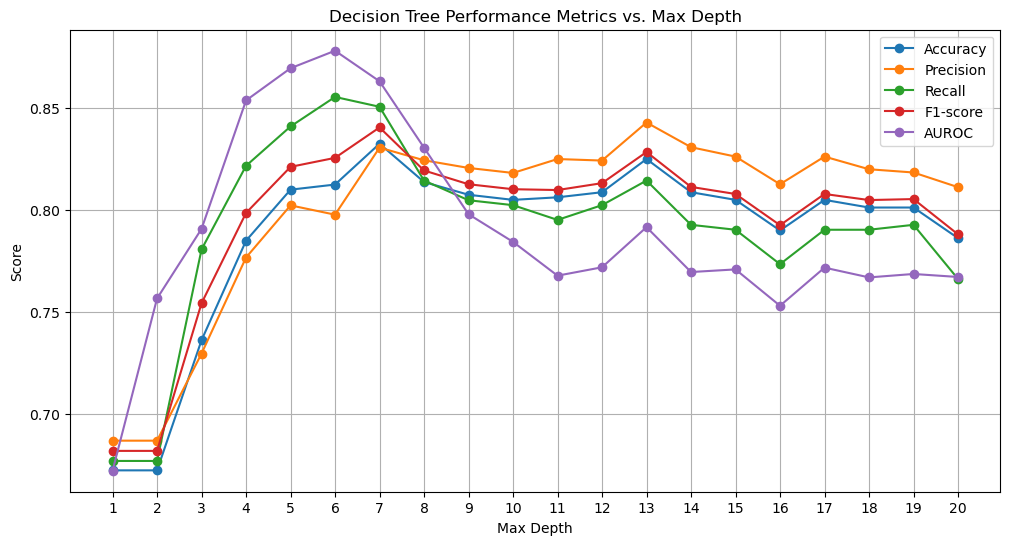

In [382]:
# plot decision tree performance for unbalanced data
decisionTreePerform(xUnbalVar, totalYLab, maxDepths)

In [ ]:
# for unbalanced plot